<a href="https://colab.research.google.com/github/Mostofa-Najmus-Sakib/Data-Science-CS533/blob/main/Assisgnment3/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3: Loan Default

## CS 533

### Loading all the libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn.metrics

### Loading the data

In [ ]:
Loan_data = pd.read_csv("SBAcase.11.13.17.csv")
len(Loan_data)
Loan_data.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.5,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.5,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.5,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.0,0,7200,24103.0,0


# Ques 1 

Split your data into training and test sets. Select 25% of the data for testing.


In [ ]:
test_data = Loan_data.sample(frac=0.25)

Since we fixed 25% as test the other 75% would be training data

In [ ]:
train_data_mask = pd.Series(True, index=Loan_data.index)
train_data_mask[test_data.index] = False
train_data = Loan_data[train_data_mask]
train_data.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.5,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.5,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.5,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.0,0,7200,24103.0,0


# Ques 2

Train a logistic regression model to predict default using New, RealEstate, Portion, and Recession.
    a. Look at the summary output. Is there a variable that we should think about dropping?
    b. If so, drop it!


In [ ]:
mod = smf.glm('Default ~ New + RealEstate + Portion + Recession', train_data, family=sm.families.Binomial()).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                 1576
Model:                            GLM   Df Residuals:                     1571
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -815.30
Date:                Sat, 26 Oct 2019   Deviance:                       1630.6
Time:                        23:04:31   Pearson chi2:                 1.49e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5354      0.264      5.826      0.000       1.019       2.052
New           -0.0815      0.165     -0.493      0.622      -0.405       0.242
RealEstate    -1.8152      0.259     -7.010      0.000      -2.323      -1.308
Portion       -3.2540      0.448     -7.265      0.000      -4.132      -2.376
Recession      0.4859      0.210      2.316      0.021       0.075       0.897
==============================================================================
"""

Is there a variable that we should think about dropping?

The p value gives us a idea about which variable to keep and which to discard. 

New and Recession variable has p value more than 0.05 which makes them insignificant, so i am dropping both of them

The model after dropping "New" and "Recession"

In [ ]:
mod = smf.glm('Default ~  RealEstate + Portion ', train_data, family=sm.families.Binomial()).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                 1576
Model:                            GLM   Df Residuals:                     1573
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -818.13
Date:                Sat, 26 Oct 2019   Deviance:                       1636.3
Time:                        23:04:33   Pearson chi2:                 1.48e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5943      0.262      6.094      0.000       1.082       2.107
RealEstate    -1.8438      0.256     -7.214      0.000      -2.345      -1.343
Portion       -3.2984      0.440     -7.488      0.000      -4.162      -2.435
==============================================================================
"""

Prediction for test data

In [ ]:
test_data['predict'] = mod.predict(test_data)
test_data.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default,predict
940,1,3075065007,ARCO PROPERTIES INC,TORRANCE,CA,90503,"SUPERIOR FINANCIAL GROUP, LLC",CA,531311,17654,...,20000,17000,0,0,0.85,0,3450,21133.0,1,0.229822
121,0,1390235000,Pine Idyllwild LLC,IDYLLWILD,CA,92549,BANK OF AMERICA NATL ASSOC,NC,531312,16644,...,10000,5000,1,0,0.50,0,2520,19260.0,0,0.486281
679,1,2621305000,"MJM Financial, Inc.",SAN DIEGO,CA,92108,BANK OF AMERICA NATL ASSOC,NC,531210,17385,...,35000,17500,0,0,0.50,0,1890,19299.0,1,0.486281
1516,1,6329144005,VARIEDADES AMANDA,LOS ANGELES,CA,90057,BANK OF AMERICA NATL ASSOC,NC,532299,15844,...,5000,2500,0,0,0.50,1,1650,17536.0,1,0.486281
1922,1,8735334008,MARIA TERESITA SANTOS,DALY CITY,CA,94014,VALLEY COMMUNITY BANK,CA,531210,16520,...,589000,441750,0,1,0.75,0,8010,24566.0,0,0.061614


Plotting for prediction

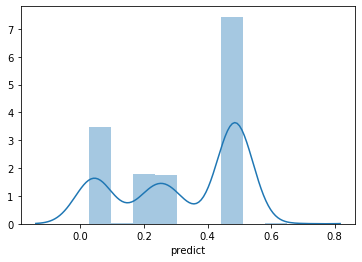

In [ ]:
sns.distplot(test_data['predict'])

# Ques 3

Classify the test loans using a threshold of 0.5 (classify as High Risk - a 1 - if the logistic regression’s estimated probability of default is at least 0.5). What is the accuracy of your model?


In [ ]:
test_data['High_Risk'] = test_data['predict'] >= 0.5
test_data.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default,predict,High_Risk
940,1,3075065007,ARCO PROPERTIES INC,TORRANCE,CA,90503,"SUPERIOR FINANCIAL GROUP, LLC",CA,531311,17654,...,17000,0,0,0.85,0,3450,21133.0,1,0.229822,False
121,0,1390235000,Pine Idyllwild LLC,IDYLLWILD,CA,92549,BANK OF AMERICA NATL ASSOC,NC,531312,16644,...,5000,1,0,0.50,0,2520,19260.0,0,0.486281,False
679,1,2621305000,"MJM Financial, Inc.",SAN DIEGO,CA,92108,BANK OF AMERICA NATL ASSOC,NC,531210,17385,...,17500,0,0,0.50,0,1890,19299.0,1,0.486281,False
1516,1,6329144005,VARIEDADES AMANDA,LOS ANGELES,CA,90057,BANK OF AMERICA NATL ASSOC,NC,532299,15844,...,2500,0,0,0.50,1,1650,17536.0,1,0.486281,False
1922,1,8735334008,MARIA TERESITA SANTOS,DALY CITY,CA,94014,VALLEY COMMUNITY BANK,CA,531210,16520,...,441750,0,1,0.75,0,8010,24566.0,0,0.061614,False


The accuracy of the model prediction

In [ ]:
(test_data['Default'] == test_data['High_Risk']).mean()

0.6349809885931559

# Ques 4

What is the accuracy of the majority class classifier? From the training data, determine whether default or not-default is the more common outcome. Use that outcome as the classification for all data in the test data (for example, if defaults are more common than not defaulting in the training data, then classify all test instances as high-risk).


In [ ]:
#lets calcaulte for the default outcome
default_no = train_data[train_data['Default']==1]['Default'].count() 
default_no

488

In [ ]:
#lets calcaulte for the not-default outcome
not_default_no = train_data[train_data['Default']==0]['Default'].count()
not_default_no

1088

From the analysis above it seems that not default is the more common outcome, so lets calculate accuracy based on not defualts

In [ ]:
test_data['Low_Risk'] = test_data['predict'] < 0.5
test_data.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,Portion,Recession,daysterm,xx,Default,predict,High_Risk,Low_Risk,test_classification,High_Risk_2
940,1,3075065007,ARCO PROPERTIES INC,TORRANCE,CA,90503,"SUPERIOR FINANCIAL GROUP, LLC",CA,531311,17654,...,0.85,0,3450,21133.0,1,0.096287,False,True,False,False
121,0,1390235000,Pine Idyllwild LLC,IDYLLWILD,CA,92549,BANK OF AMERICA NATL ASSOC,NC,531312,16644,...,0.50,0,2520,19260.0,0,0.281476,False,True,True,False
679,1,2621305000,"MJM Financial, Inc.",SAN DIEGO,CA,92108,BANK OF AMERICA NATL ASSOC,NC,531210,17385,...,0.50,0,1890,19299.0,1,0.486220,False,True,False,False
1516,1,6329144005,VARIEDADES AMANDA,LOS ANGELES,CA,90057,BANK OF AMERICA NATL ASSOC,NC,532299,15844,...,0.50,1,1650,17536.0,1,0.569760,False,False,False,True
1922,1,8735334008,MARIA TERESITA SANTOS,DALY CITY,CA,94014,VALLEY COMMUNITY BANK,CA,531210,16520,...,0.75,0,8010,24566.0,0,0.031673,False,True,True,False


Since not-defaults are more common than defaulting in the training data, lets classify all test instances as high-risk, to do that an extra column is added where true negatives are 1and the rest are 0, finally the accuracy is caluclated

In [ ]:
test_data['test_classification'] = (test_data['Default'] == 0) & (test_data['Low_Risk'] == True)
Major_accuracy = (test_data['test_classification'].sum())/(test_data['Default'].count())
print('Accuracy of the majority class classifier: ', Major_accuracy)

Accuracy of the majority class classifier:  0.5665399239543726


# Ques 5

What does the relationship between the majority class accuracy and your classifier’s accuracy tell you about classification?


The majority class accuracy was lower compared to the classifiers accuracy

# Ques 6

Show the confusion matrix for your classifier. The confusion matrix is a 2x2 table: the columns are the true outcome (default or not) and the rows are the classifier decision (high or low risk); the value in each cell is the number of data points in that combination (e..g. ‘Classified as low-risk but defaulted’ or ‘Classified as low-risk and did not default’).

In [ ]:
df = pd.DataFrame(test_data, columns=['Default','High_Risk'])
confusion_matrix = pd.crosstab(df['Default'], df['High_Risk'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,False,True
Actual,,
0,327,1
1,198,0


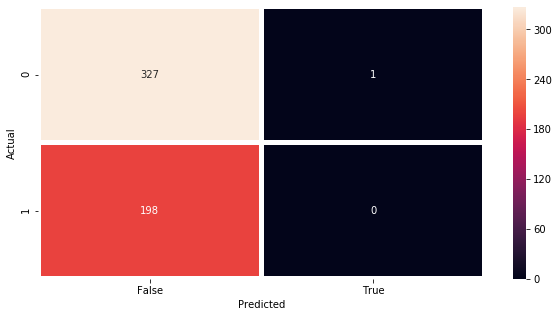

In [ ]:
fig, axis = plt.subplots(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", linewidths=4, ax=axis)

#sns.heatmap(confusion_matrix, annot=True)

# Ques 7

Accuracy counts false positives and false negatives as equal errors; however, in reality, they do not have the same cost. Compute the cost of your classifier by assigning a cost of 5 to false negatives (classified as low-risk but defaulted), 1 to false positives (classified as high-risk and did not default), and 0 to correct classifications. What is the cost of your classifier with a threshold of 0.5?


In [ ]:
#Lets calculate the cost
cost = confusion_matrix.loc[0,1]*1+confusion_matrix.loc[1,0]*5 
cost 

991

# Ques 8

How does the accuracy change as you change the threshold? Make a plot that has threshold on the x-axis and the accuracy at that threshold on the y-axis.


Defing a function to create the accuracy

In [ ]:
def accuracy(thresh):
    dec = test_data['predict'] > thresh
    return (dec == test_data['Default']).mean()

Lets create a thresold range to calculate the accurcay

In [ ]:
thresholds = np.arange(0, 1, 0.05)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

A final dataframe to store thresold and their corresponding accuracy

In [ ]:
acc_curve = pd.DataFrame({'threshold': thresholds})
acc_curve['accuracy'] = acc_curve['threshold'].apply(accuracy)
acc_curve.head()

,threshold,accuracy
0,0.00,0.376426
1,0.05,0.513308
2,0.10,0.596958
3,0.15,0.598859
4,0.20,0.598859


Accuracy plot with corresponding thresold

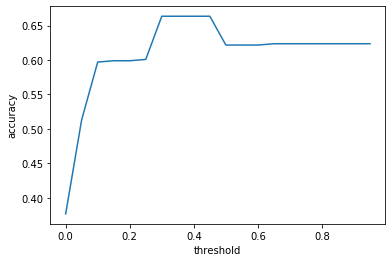

In [ ]:
sns.lineplot('threshold', 'accuracy', data=acc_curve)

The highest accuracy was around 0.5

# Ques 9

How does cost change with the threshold?


Lets define a function to caclaute cost

In [ ]:
def cost(thresh):
    
    test_data['High_Risk'] = test_data['predict'] >= thresh
    df = pd.DataFrame(test_data, columns=['Default','High_Risk'])
    confusion_matrix = pd.crosstab(df['Default'], df['High_Risk'], rownames=['Actual'], colnames=['Predicted'])
    #lets put the requied values from confuion matrix in a variable
    x1 = confusion_matrix.loc[0,1]
    x2 = confusion_matrix.loc[1,0]
    cost = (x1*1 + x2*5) # calculation of cost based on the confusion matrix
    return cost


In [ ]:
test_data['predict'].describe()
test_data['predict'].max()

0.6491795698761063

Unlike calculating accuracy the cost cannot be calculated at all the data points from 0 to 1, because the maxm predicted value is much less than 1, sothis time we will create thresold from minm to maxm value of predict variable

In [ ]:
thresholds = np.arange((test_data['predict'].min()+0.01), test_data['predict'].max(), 0.05)
acc_curve = pd.DataFrame({'threshold': thresholds})
acc_curve['cost'] = acc_curve['threshold'].apply(cost)
acc_curve.head()

,threshold,cost
0,0.037981,265
1,0.087981,232
2,0.137981,231
3,0.187981,231
4,0.237981,358


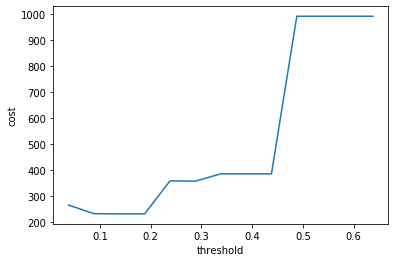

In [ ]:
sns.lineplot('threshold', 'cost', data=acc_curve)

The highest cost was at a thresold of 0.5 just like the accuracy

# Ques 10

Try 2 additional predictor variables, and see if they improve your model’s accuracy and/or cost on the test data.


In [ ]:
train_data.head()

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.5,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.5,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.5,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.5,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.0,0,7200,24103.0,0


Lets add extra 2 variables with the previous significant ones (ResalEstate, Portion). This time adding daysterm and DisbursementGross. 

In [ ]:
mod2 = smf.glm('Default ~ daysterm   + RealEstate + Portion + DisbursementGross  ', train_data, family=sm.families.Binomial()).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                 1576
Model:                            GLM   Df Residuals:                     1571
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -689.66
Date:                Sat, 26 Oct 2019   Deviance:                       1379.3
Time:                        23:05:11   Pearson chi2:                 7.27e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.9976      0.325      9.236      0.000       2.362       3.634
daysterm             -0.0014      0.000    -13.456      0.000      -0.002      -0.001
RealEstate            5.2554      0.584      8.997      0.000       4.111       6.400
Portion              -0.8696      0.520     -1.671      0.095      -1.890       0.150
DisbursementGross  1.832e-07   3.47e-07      0.528      0.598   -4.97e-07    8.64e-07
=====================================================================================
"""

Portion and DisbursementGross both becomes insignificant, so lets drop them and only keep daysterm and RealEstate

In [ ]:
mod2 = smf.glm('Default ~ daysterm   + RealEstate ', train_data, family=sm.families.Binomial()).fit()
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Default   No. Observations:                 1576
Model:                            GLM   Df Residuals:                     1573
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -691.10
Date:                Sat, 26 Oct 2019   Deviance:                       1382.2
Time:                        23:05:12   Pearson chi2:                 8.25e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5909      0.210     12.320      0.000       2.179       3.003
daysterm      -0.0014   9.71e-05    -14.412      0.000      -0.002      -0.001
RealEstate     5.2032      0.572      9.089      0.000       4.081       6.325
==============================================================================
"""

So this two variable becomes significant

Now lets predict for thsi new model

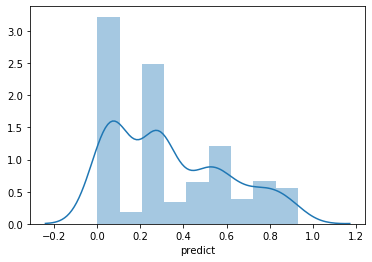

In [ ]:
test_data['predict'] = mod2.predict(test_data)
test_data.head()
sns.distplot(test_data['predict'])

Lets create the confusion matrix for this model

In [ ]:
test_data['High_Risk_2'] = test_data['predict'] >= 0.5
df = pd.DataFrame(test_data, columns=['Default','High_Risk_2'])
confusion_matrix = pd.crosstab(df['Default'], df['High_Risk_2'], rownames=['Actual'], colnames=['Predicted'])
confusion_matrix

Predicted,False,True
Actual,,
0,298,30
1,67,131


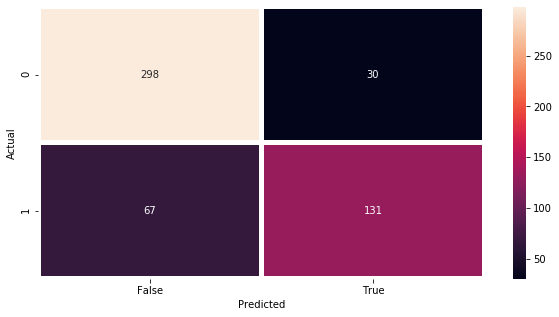

In [ ]:
fig, axis = plt.subplots(figsize=(10, 5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", linewidths=4, ax=axis)


Ploting accuracy per threosld like the previous model

In [ ]:
thresholds = np.arange(0, 1, 0.05)
thresholds
acc_curve = pd.DataFrame({'threshold': thresholds})
acc_curve['accuracy'] = acc_curve['threshold'].apply(accuracy)
acc_curve.head()

,threshold,accuracy
0,0.00,0.376426
1,0.05,0.469582
2,0.10,0.676806
3,0.15,0.671103
4,0.20,0.671103


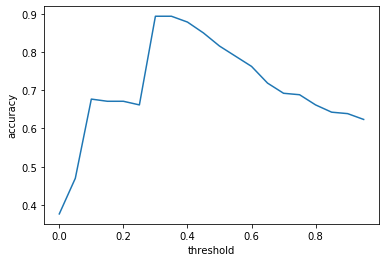

In [ ]:
sns.lineplot('threshold', 'accuracy', data=acc_curve)

Calculation of cost for the new model

Ploting cost per threosld like the previous model, this time also we would select min and max of predict to select thresold

In [ ]:
test_data['predict'].describe()
test_data['predict'].max()

0.9302745963283976

In [ ]:
thresholds = np.arange((test_data['predict'].min()+0.01), test_data['predict'].max(), 0.05)
acc_curve = pd.DataFrame({'threshold': thresholds})
acc_curve['cost'] = acc_curve['threshold'].apply(cost)
acc_curve.head()

,threshold,cost
0,0.010964,283
1,0.060964,302
2,0.110964,201
3,0.160964,225
4,0.210964,233


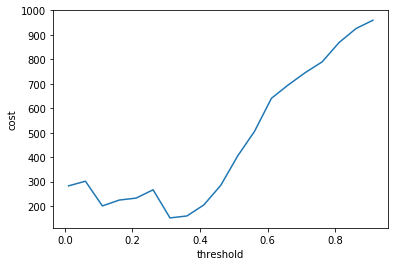

In [ ]:
sns.lineplot('threshold', 'cost', data=acc_curve)

By selecting new combination of variables the models accuracy increase a lot, the new accurcay is almost 0.9 and cost also reduces at maxm accuracy point